# Results

In [4]:
import numpy as np
import pylab as pl
%matplotlib notebook

<IPython.core.display.Javascript object>


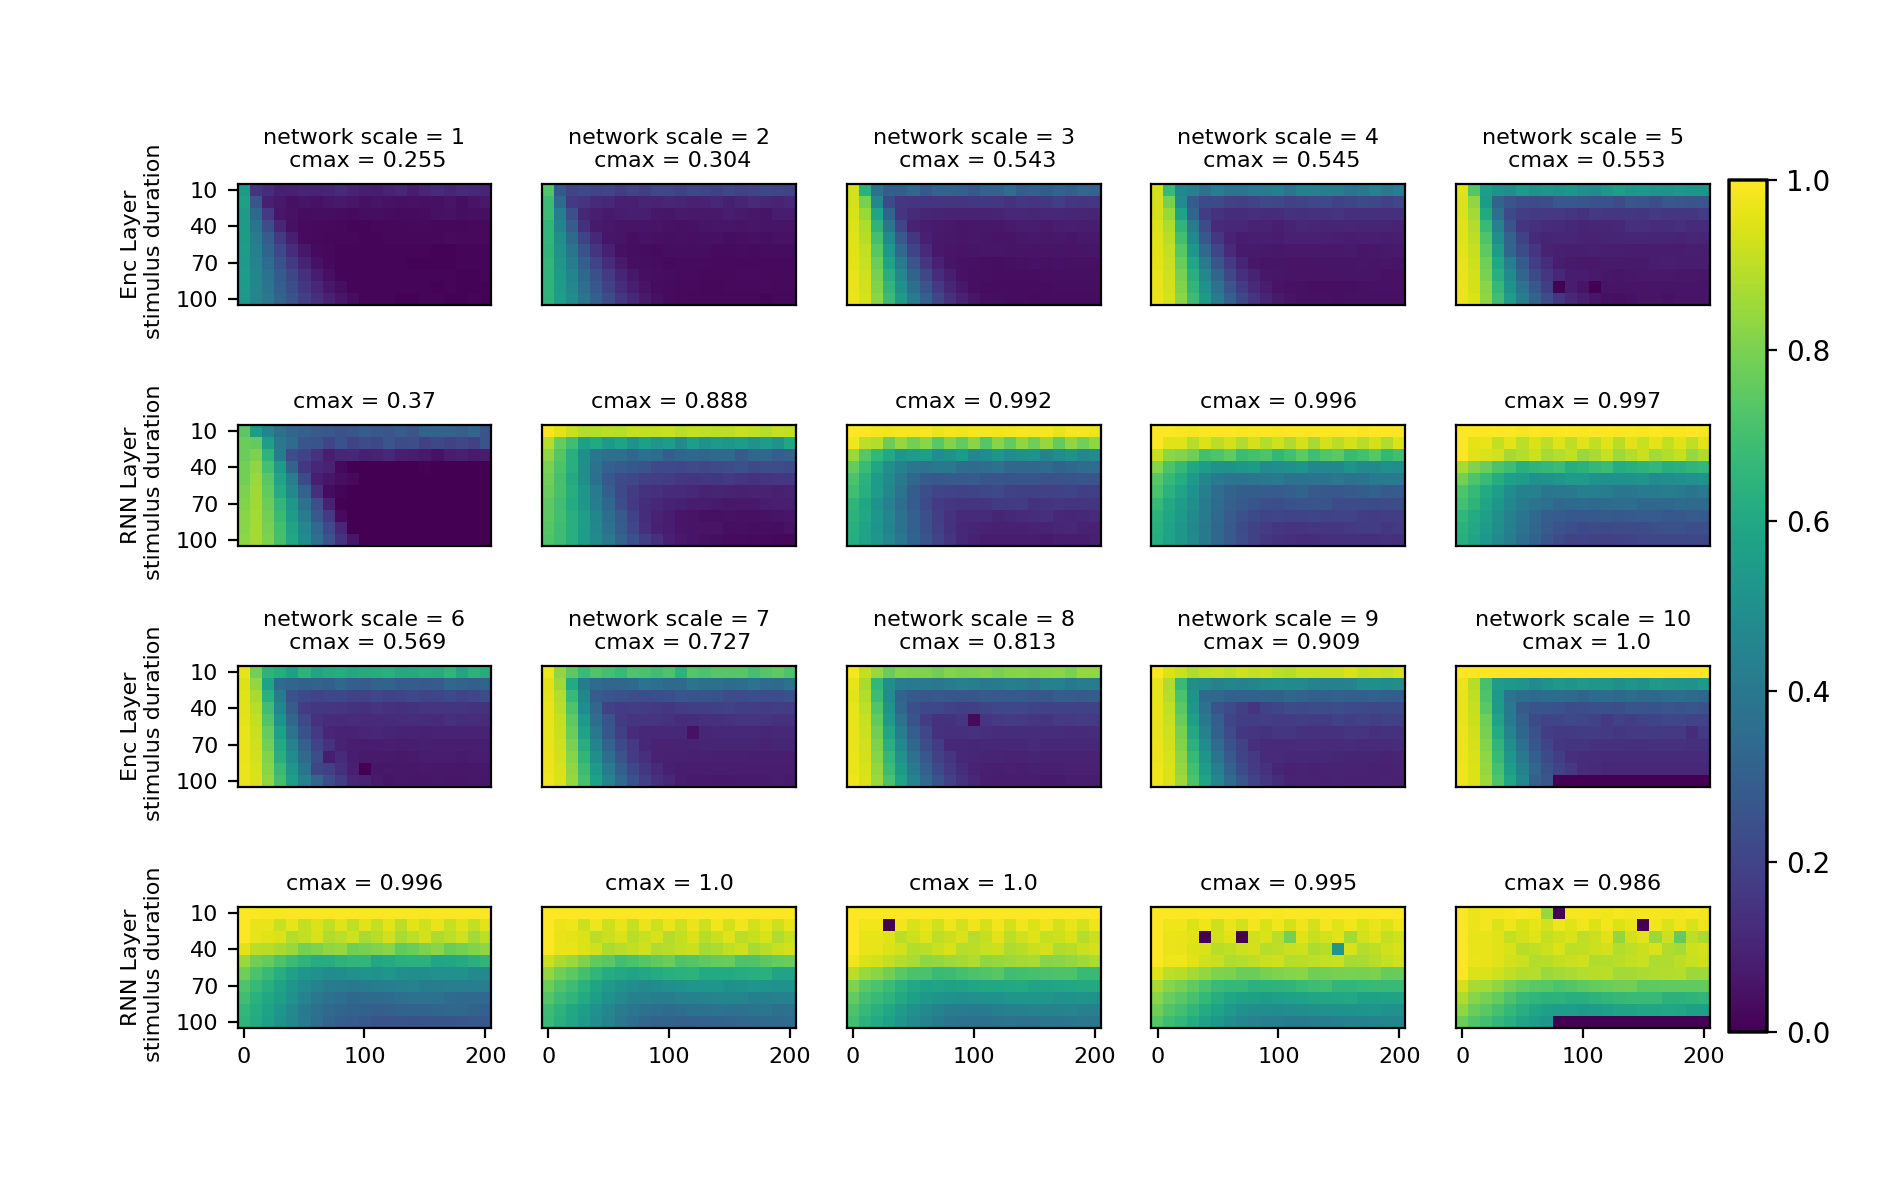

In [33]:
u_val=0.
pl.rcParams['figure.figsize'] = [9.5, 6]
fig =pl.figure()
pl.tight_layout()
for network_scale in range(1,11):
    
    if network_scale>5:
        subplot_num=network_scale+5
    else:
        subplot_num=network_scale
    fig.add_subplot(4,5,subplot_num)

    data_lif = np.loadtxt("resultsParamAndDur_networkScale_{0}.csv".format(str(network_scale)), delimiter=',')

    results_mat=np.zeros((len(np.unique(data_lif[:,2])),len(np.unique(data_lif[:,3]))))
    for d_ind,dvals in enumerate(np.sort(np.unique(data_lif[:,2]))):
        for lag_ind,lag in enumerate(np.sort(np.unique(data_lif[:,3]))):
            ind_sel=np.where((data_lif[:,2]==dvals) & (data_lif[:,1]==u_val) & (data_lif[:,3]==lag))
            if not ind_sel[0].size==0:
                results_mat[d_ind,lag_ind]=data_lif[ind_sel,4]

    im=pl.imshow(results_mat)
    pl.clim(0, 1)
    pl.title("network scale = {0}\n cmax = {1}".format(str(network_scale),str(np.round(np.max(results_mat[:,4]),decimals=3))),fontdict={"size":8})
    pl.xticks(np.arange(0,len(np.unique(data_lif[:,3])),10),np.round(np.unique(data_lif[:,3]))[np.arange(0,len(np.unique(data_lif[:,3])),10)])
    pl.yticks(np.arange(0,len(np.unique(data_lif[:,2])),3),np.unique(data_lif[:,2])[np.arange(0,len(np.unique(data_lif[:,2])),3)])
    pl.gca().axes.get_xaxis().set_visible(False)
    if network_scale==1 or network_scale==6:
        pl.yticks(np.arange(0,len(np.unique(data_lif[:,2])),3),np.asanyarray(np.unique(data_lif[:,2])[np.arange(0,len(np.unique(data_lif[:,2])),3)],dtype=int),fontsize = 8)
        pl.ylabel("Enc Layer\n stimulus duration",fontdict={"size":8} )
    else:
        pl.gca().axes.get_yaxis().set_visible(False)
        
    pl.show()
    
    fig.add_subplot(4,5,subplot_num+5)

    data_lif = np.loadtxt("resultsParamAndDur_networkScale_{0}.csv".format(str(network_scale)), delimiter=',')

    results_mat=np.zeros((len(np.unique(data_lif[:,2])),len(np.unique(data_lif[:,3]))))
    for d_ind,dvals in enumerate(np.sort(np.unique(data_lif[:,2]))):
        for lag_ind,lag in enumerate(np.sort(np.unique(data_lif[:,3]))):
            ind_sel=np.where((data_lif[:,2]==dvals) & (data_lif[:,1]==u_val) & (data_lif[:,3]==lag))
            if not ind_sel[0].size==0:
                results_mat[d_ind,lag_ind]=data_lif[ind_sel,6]

    im=pl.imshow(results_mat)
    pl.clim(0, 1)  
    pl.title("cmax = {0}".format(str(np.round(np.max(results_mat[:,6]),decimals=3))),fontdict={"size":8})
    
    if network_scale==1 or network_scale==6:
        pl.yticks(np.arange(0,len(np.unique(data_lif[:,2])),3),np.asanyarray(np.unique(data_lif[:,2])[np.arange(0,len(np.unique(data_lif[:,2])),3)],dtype=int),fontsize = 8)
        pl.ylabel("RNN Layer\n stimulus duration",fontdict={"size":8} )
    else:
        pl.gca().axes.get_yaxis().set_visible(False)
        
    if subplot_num>10:
        pl.xticks(np.arange(0,len(np.unique(data_lif[:,3])),10),np.asanyarray(np.unique(data_lif[:,3])[np.arange(0,len(np.unique(data_lif[:,3])),10)],dtype=int),fontsize = 8)
    else:
        pl.gca().axes.get_xaxis().set_visible(False)
        
    cbar_ax = fig.add_axes([0.91, 0.14, 0.02, 0.71])
    fig.colorbar(im, cax=cbar_ax)
    pl.show()
    pl.savefig("duration_over_decay.png")




<IPython.core.display.Javascript object>


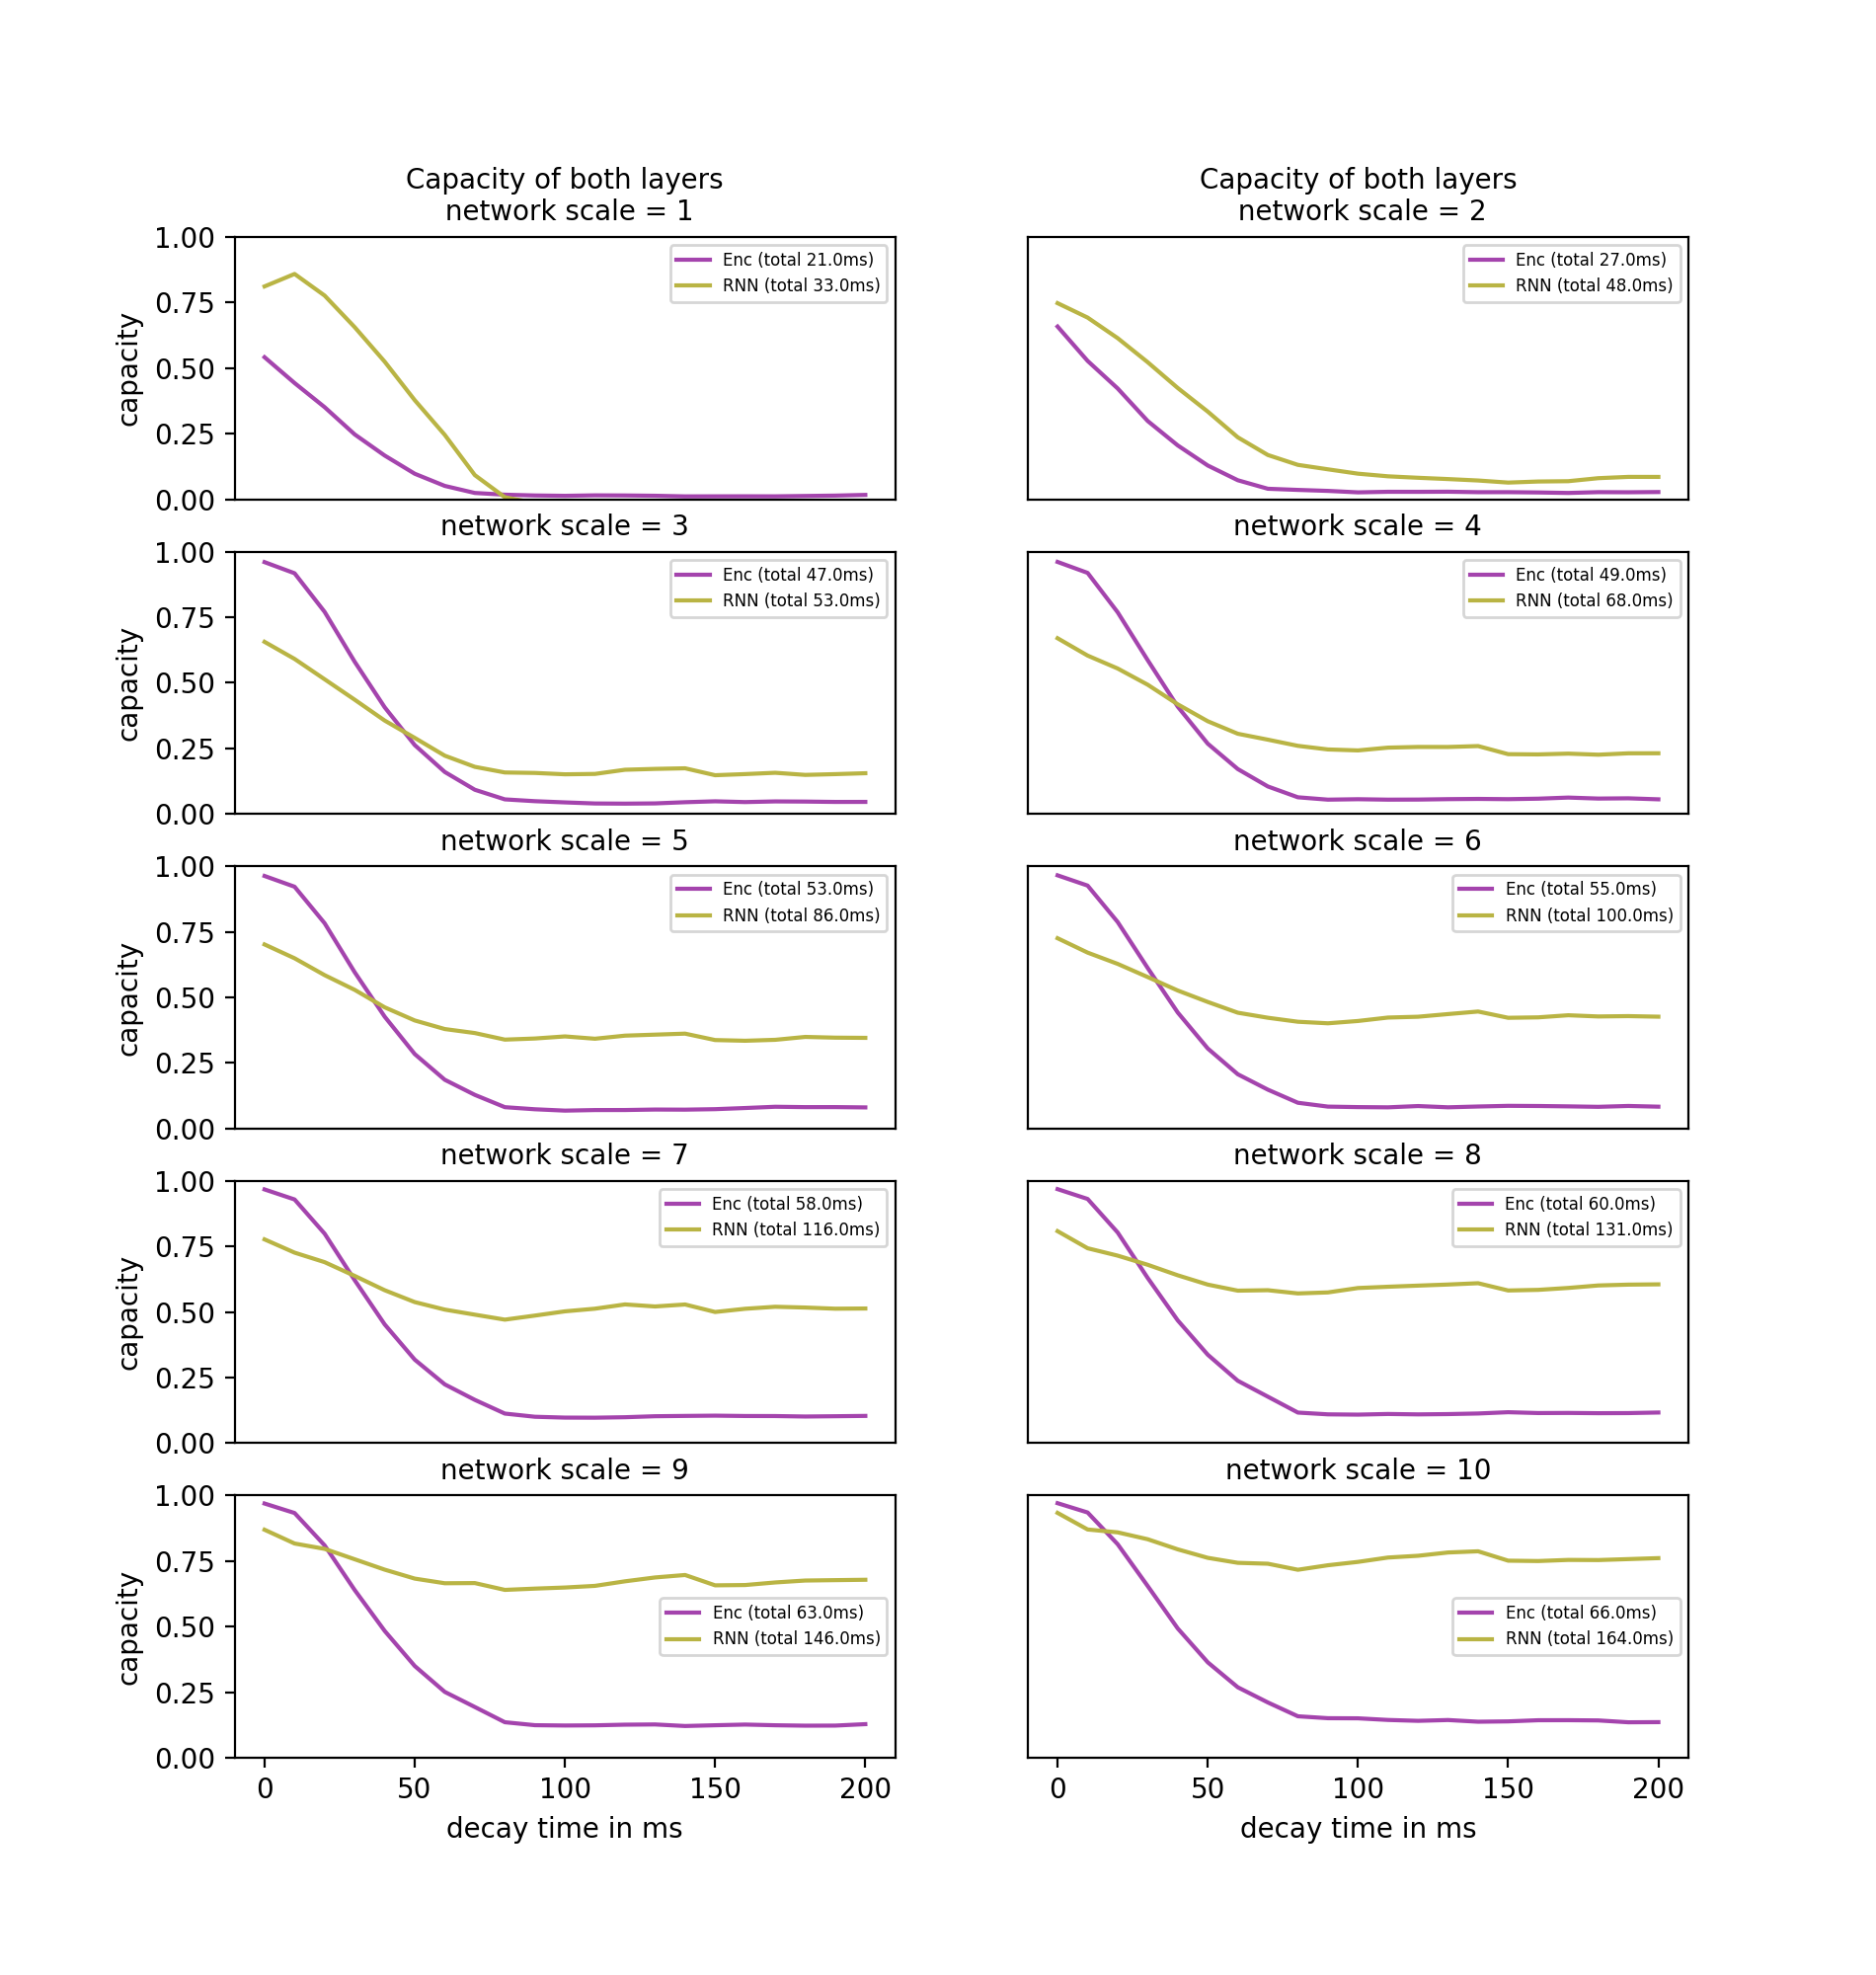

In [32]:
pl.rcParams['figure.figsize'] = [9.5, 10]
fig = pl.figure()
for network_scale in range(1,11):
    fig.add_subplot(5,2,network_scale)
    duration=70.
    uval=0.
    data_lif = np.loadtxt("resultsParamAndDur_networkScale_{0}.csv".format(str(network_scale)), delimiter=',')
    ind_sel=np.where((data_lif[:,2]==duration) & (data_lif[:,1]==uval))

    encoder_capacity=data_lif[ind_sel,4]
    circuit_capacity=data_lif[ind_sel,6]

    subsampling_factor = 100
    max_lag = 210./(subsampling_factor)  # [ms] in this example
    step_lag = 10./(subsampling_factor)   # [ms] - if != dt (index the time axis)
    time_lags = np.arange(0., max_lag, step_lag)

    tot_cap_enc = round(np.sum(encoder_capacity*subsampling_factor)*step_lag)
    tot_cap_rnn = round(np.sum(circuit_capacity*subsampling_factor)*step_lag)

    
    pl.plot(time_lags*subsampling_factor, encoder_capacity[0],'#A444AD')
    pl.plot(time_lags*subsampling_factor, circuit_capacity[0],'#B9B444')
    
    if network_scale >8:
        pl.legend(("Enc (total {0}ms)".format(str(tot_cap_enc)), "RNN (total {0}ms)".format(str(tot_cap_rnn))),loc='center right',prop={'size': 6})
        pl.xlabel("decay time in ms")
    else:
        pl.legend(("Enc (total {0}ms)".format(str(tot_cap_enc)), "RNN (total {0}ms)".format(str(tot_cap_rnn))),loc='upper right',prop={'size': 6})
        pl.xticks([])
    if network_scale <3:
        pl.title("Capacity of both layers\n network scale = {0}".format(str(network_scale)),fontdict={"size":10})
    else:
        pl.title("network scale = {0}".format(str(network_scale)),fontdict={"size":10})
        
    if np.mod(network_scale,2):
        pl.ylabel("capacity")
    else:
        pl.yticks([])
    pl.ylim(0, 1)
    pl.show()
    pl.savefig("capacity_over_decay.png")

<IPython.core.display.Javascript object>


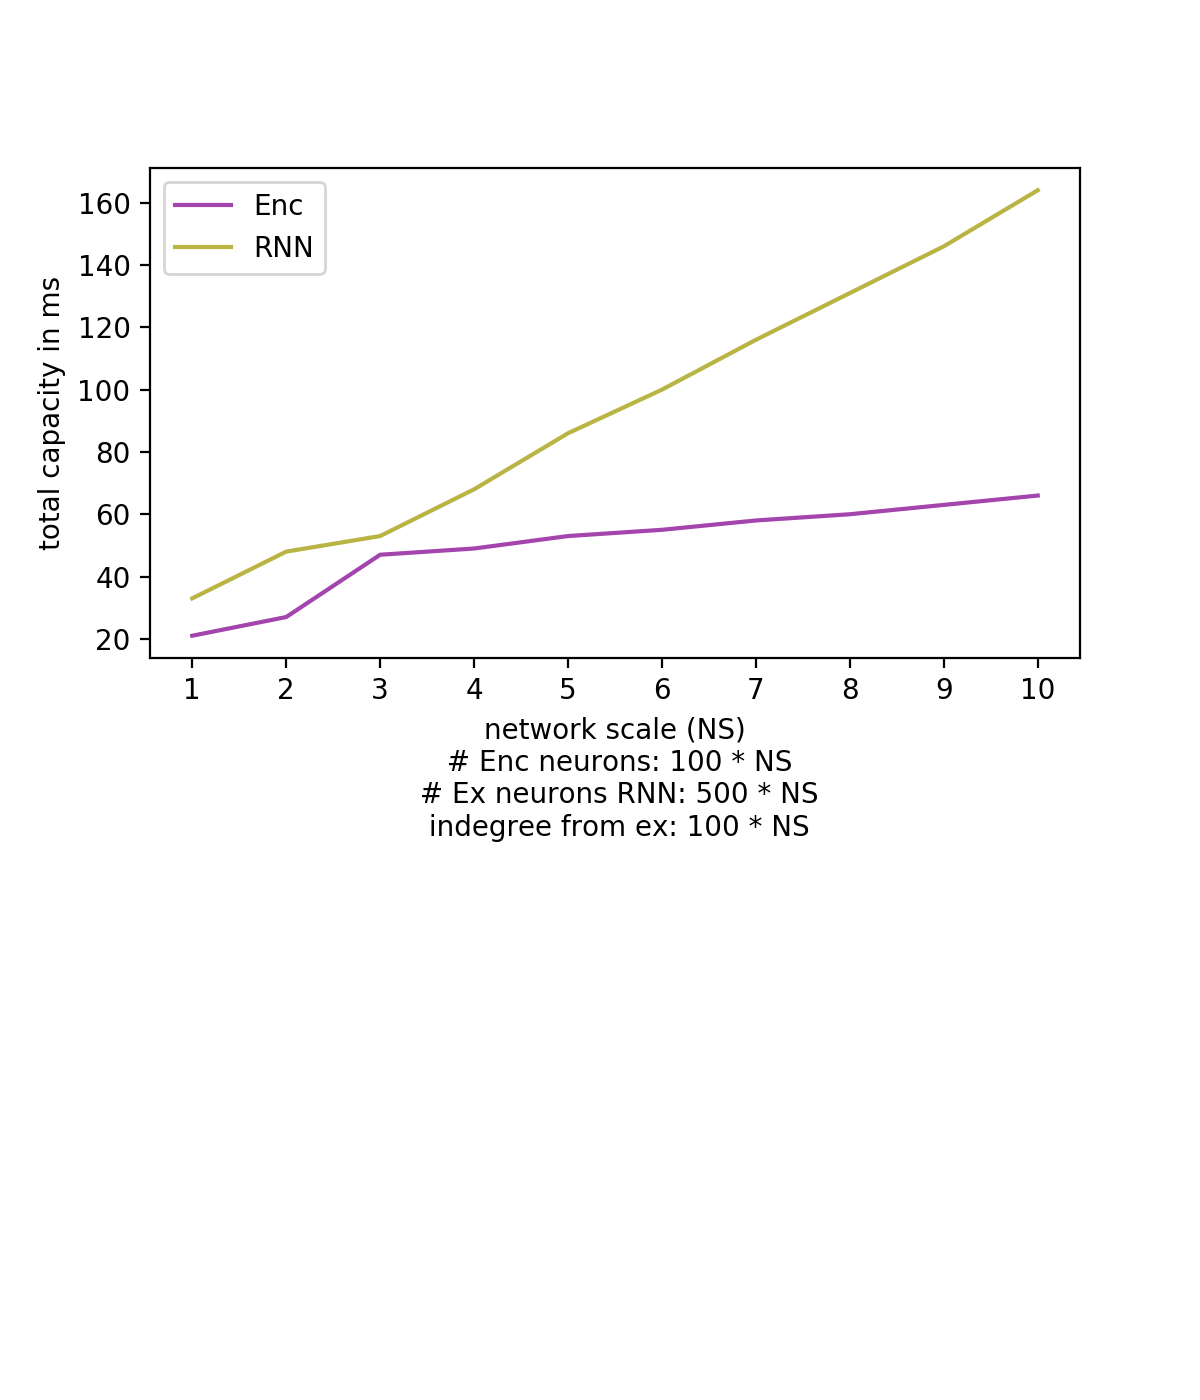

In [36]:
pl.rcParams['figure.figsize'] = [6, 7]
fig = pl.figure()
enc_cap=[]
circ_cap=[]
for network_scale in range(1,11):
    fig.add_subplot(211)
    duration=70.
    uval=0.
    data_lif = np.loadtxt("resultsParamAndDur_networkScale_{0}.csv".format(str(network_scale)), delimiter=',')
    ind_sel=np.where((data_lif[:,2]==duration) & (data_lif[:,1]==uval))

    encoder_capacity=data_lif[ind_sel,4]
    circuit_capacity=data_lif[ind_sel,6]

    subsampling_factor = 100
    max_lag = 210./(subsampling_factor)  # [ms] in this example
    step_lag = 10./(subsampling_factor)   # [ms] - if != dt (index the time axis)
    time_lags = np.arange(0., max_lag, step_lag)

    tot_cap_enc = round(np.sum(encoder_capacity*subsampling_factor)*step_lag)
    tot_cap_rnn = round(np.sum(circuit_capacity*subsampling_factor)*step_lag)
    enc_cap.append(tot_cap_enc)
    circ_cap.append(tot_cap_rnn)
pl.plot(enc_cap,'#A444AD')
pl.plot(circ_cap,'#B9B444')
pl.xlabel("network scale (NS)\n # Enc neurons: 100 * NS\n # Ex neurons RNN: 500 * NS\n indegree from ex: 100 * NS")
pl.ylabel("total capacity in ms")
pl.xticks(range(0,10),range(1,11))
pl.legend(("Enc","RNN"))
pl.show()
pl.savefig("capacity_over_size.png")